다음주 까지. 팀으로 구현.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
1. 이미지에서 추가 실험
 - slope error 종류 노이즈 추가하기. (Ax+b.   x: 픽셀 위치.  A가 (2,1).  b는 1차원  )

2. 시계열 denoise - Auto encoding 실험
 - 시계열 data (고민)
 - LSTM 기반 auto encoder
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# 1. slope noise 실험

# 1-1. Dense layer

### Gaussian noise

Epoch 1/10
235/235 [==============================] - 9s 25ms/step - loss: 0.2325 - val_loss: 0.1674
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1523 - val_loss: 0.1386
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.1336 - val_loss: 0.1273
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1251 - val_loss: 0.1215
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1203 - val_loss: 0.1181
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1174 - val_loss: 0.1160
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1153 - val_loss: 0.1145
Epoch 8/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1139 - val_loss: 0.1133
Epoch 9/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1129 - val_loss: 0.1124
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


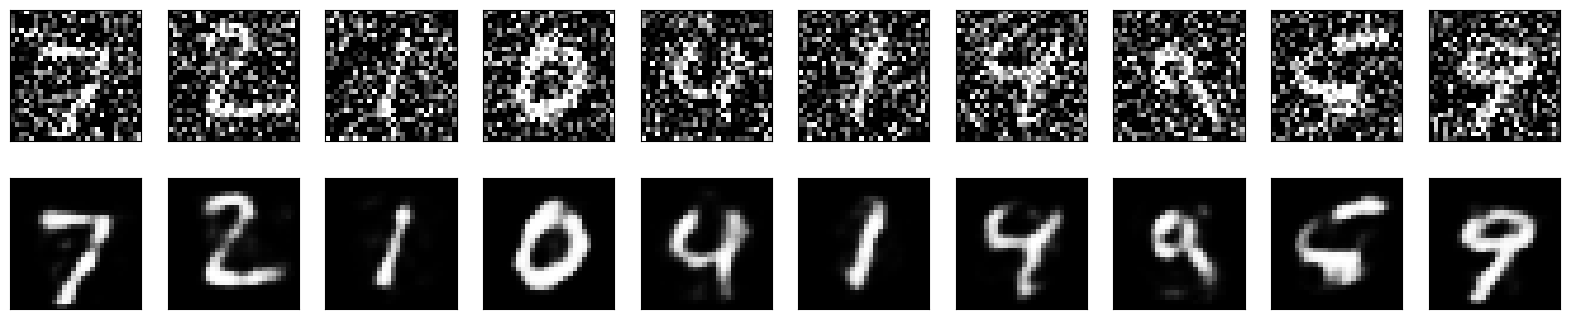

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# MNIST 데이터 로드
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 정규화 및 전처리
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 데이터를 벡터로 변환
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# 이미지에 노이즈 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) # 정규분포로 노이즈 추가(평균 0, 표준편차 1 ; 표준 정규분포)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# 노이즈가 추가된 이미지를 0과 1 사이로 클리핑
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Autoencoder 모델 정의
## 단순 dense layer로 구성
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img) # hidden layer 역할
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 훈련
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# 노이즈가 있는 테스트 이미지 입력
encoded_imgs = autoencoder.predict(x_test_noisy)

# 결과를 플로팅
n = 10  # 몇 개의 이미지를 플로팅할지 결정
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### slope noise


#### 아핀 변환 느낌
- image data 자체에 Ax+b 적용

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2816 - val_loss: 0.2632
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2634 - val_loss: 0.2632
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2633 - val_loss: 0.2631
Epoch 4/10
235/235 [==============================] - 4s 15ms/step - loss: 0.2633 - val_loss: 0.2634
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.2633 - val_loss: 0.2628
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.2632 - val_loss: 0.2630
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2633 - val_loss: 0.2628
Epoch 8/10
235/235 [==============================] - 4s 15ms/step - loss: 0.2632 - val_loss: 0.2631
Epoch 9/10
235/235 [==============================] - 4s 19ms/step - loss: 0.2632 - val_loss: 0.2633
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


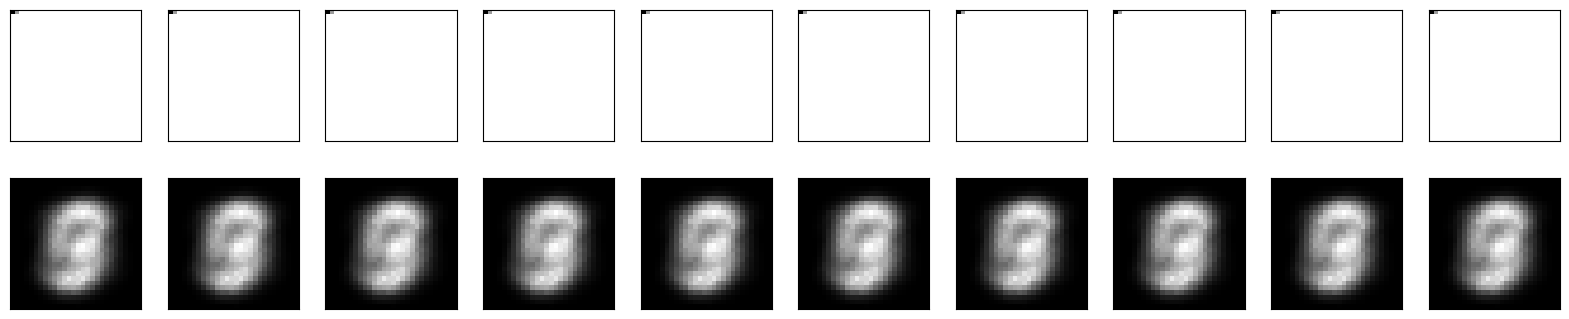

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# MNIST 데이터 로드
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 정규화 및 전처리
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 데이터를 벡터로 변환
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# 이미지에 slope 노이즈 추가
def add_slope_noise(images, A, b):
    noisy_images = []
    for image in images:
        # 이미지 크기
        image_size = image.size

        # 기울기 노이즈 생성
        x = np.arange(image_size)
        slope_noise = (A[0] * x + A[1] + b).reshape(image.shape)

        # 이미지에 기울기 노이즈 추가
        noisy_image = image + slope_noise

        # 값 범위를 0과 1 사이로 클리핑
        noisy_image = np.clip(noisy_image, 0., 1.)

        noisy_images.append(noisy_image)

    return np.array(noisy_images)

# 기울기 노이즈 파라미터 설정
A = np.random.rand(2, 1)  # 2x1 행렬 A를 무작위로 생성
b = np.random.rand(1)     # 스칼라 b를 무작위로 생성

# 이미지에 slope 노이즈 추가
x_train_noisy = add_slope_noise(x_train, A, b)
x_test_noisy = add_slope_noise(x_test, A, b)

# Autoencoder 모델 정의
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 훈련
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# 노이즈가 있는 테스트 이미지 입력
encoded_imgs = autoencoder.predict(x_test_noisy)

# 결과를 플로팅
n = 10  # 몇 개의 이미지를 플로팅할지 결정
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거된 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#### slope noise matrix를 만들어서 기존 이미지에 추가

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2640 - val_loss: 0.2138
Epoch 2/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1902 - val_loss: 0.1700
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1598 - val_loss: 0.1487
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1428 - val_loss: 0.1349
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1313 - val_loss: 0.1252
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1229 - val_loss: 0.1178
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1164 - val_loss: 0.1121
Epoch 8/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1113 - val_loss: 0.1075
Epoch 9/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1071 - val_loss: 0.1038
Epoch 10/10
313/313 [==============================] - 2s 5ms/step


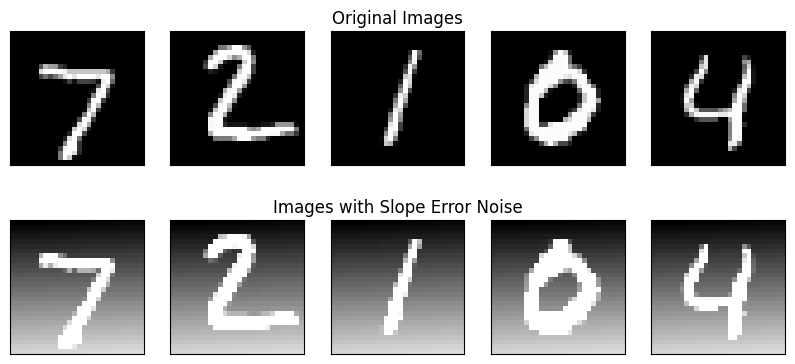

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# MNIST 데이터 로드
(X_train, _), (X_test, _) = mnist.load_data()

# 데이터 정규화 및 전처리
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 데이터를 벡터로 변환
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))


# 이미지에 노이즈 추가
noise_factor = 0.3
# 기울기 오차 노이즈 생성
slope = 2
bias = 1

# 기울기 및 편향을 적용한 슬로프 에러 노이즈 행렬 생성
slope_error_matrix_test = slope * np.linspace(0, 1, X_test.shape[1]).reshape(1, -1) + bias
slope_error_matrix_test = np.tile(slope_error_matrix_test, (X_test.shape[0], 1))

slope_error_matrix_train = slope * np.linspace(0, 1, X_train.shape[1]).reshape(1, -1) + bias
slope_error_matrix_train = np.tile(slope_error_matrix_train, (X_train.shape[0], 1))

# 원본 데이터에 기울기 오차 노이즈 추가
X_train_w_slope_error = X_train + noise_factor * slope_error_matrix_train
X_test_w_slope_error = X_test + noise_factor * slope_error_matrix_test


# clip 함수를 사용하여 값이 너무 커지거나 작아지는 것을 방지
X_test_w_slope_error = np.clip(X_test_w_slope_error, 0.0, 1.0)
X_train_w_slope_error = np.clip(X_train_w_slope_error, 0.0, 1.0)

# Autoencoder 모델 정의
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# 모델 훈련
autoencoder.fit(X_train_w_slope_error, X_train, epochs=10, batch_size=256, shuffle=True, validation_data=(X_test_w_slope_error, X_test))


# 노이즈가 있는 테스트 이미지 입력
encoded_imgs = autoencoder.predict(X_test_w_slope_error)


# 결과를 플로팅
n = 5
# 기울기 오차 노이즈가 추가된 이미지 시각화
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # 원본 이미지 플로팅
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # 기울기 오차 노이즈가 추가된 이미지 플로팅
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_w_slope_error[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Images with Slope Error Noise')

plt.show()

아래는 기울기 오차 노이즈가 추가된 이미지에 대한 노이즈 제거(autoencoder 모델을 사용한) 코드입니다.

313/313 [==============================] - 1s 3ms/step


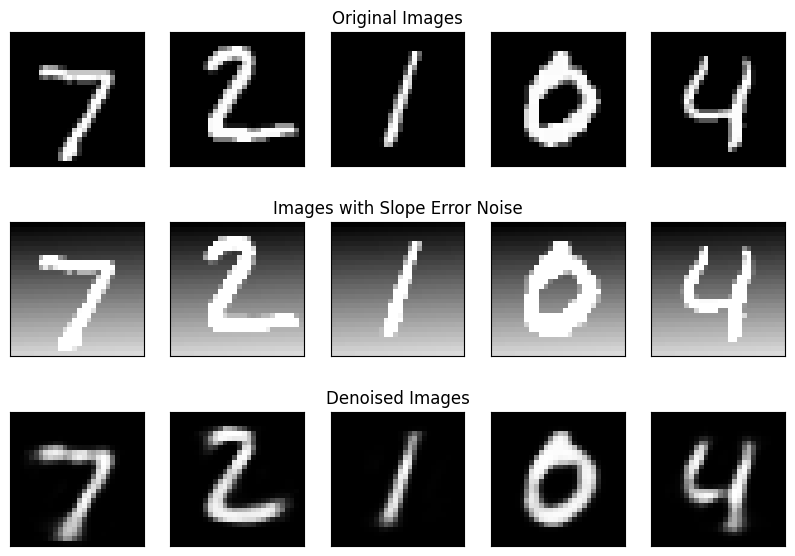

In [22]:
# 노이즈가 있는 테스트 이미지 입력
encoded_imgs = autoencoder.predict(X_test_w_slope_error)

# 결과를 플로팅
n = 5
# 기울기 오차 노이즈가 추가된 이미지 및 노이즈 제거된 이미지 시각화
plt.figure(figsize=(10, 7))
for i in range(n):
    # 원본 이미지 플로팅
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # 기울기 오차 노이즈가 추가된 이미지 플로팅
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(X_test_w_slope_error[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Images with Slope Error Noise')

    # 노이즈 제거된 이미지 플로팅
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Denoised Images')

plt.show()


# 1-2. CNN

## slope noise

### slope noise matrix를 만들어서 기존 이미지에 추가

#### 방법1

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 68s 35ms/step - loss: 0.1329 - val_loss: 0.0867
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0839 - val_loss: 0.0801
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0783 - val_loss: 0.0760
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0755 - val_loss: 0.0737
Epoch 5/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0739 - val_loss: 0.0726
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0729 - val_loss: 0.0720
Epoch 7/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0724 - val_loss: 0.0715
Epoch 8/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0719 - val_loss: 0.0719
Epoch 9/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0714 - val_loss: 0.0706

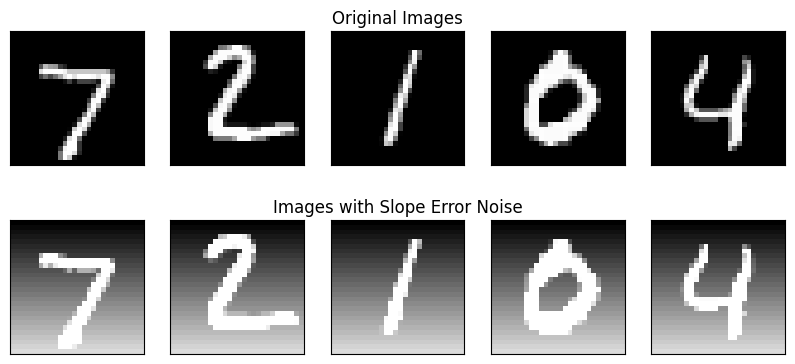

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf

# MNIST 데이터 로드
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 정규화 및 전처리
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 데이터 차원 추가 (채널 추가)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 이미지에 노이즈 추가
noise_factor = 0.3
slope = 2
bias = 1

# 기울기 및 편향을 적용한 슬로프 에러 노이즈 행렬 생성
slope_error_matrix_test = slope * np.linspace(0, 1, x_test.shape[1]).reshape(1, -1) + bias
slope_error_matrix_test = np.tile(slope_error_matrix_test, (x_test.shape[0], 1))

slope_error_matrix_train = slope * np.linspace(0, 1, x_train.shape[1]).reshape(1, -1) + bias
slope_error_matrix_train = np.tile(slope_error_matrix_train, (x_train.shape[0], 1))

# slope_error_matrix의 형태를 (10000, 28, 28, 1)로 변경
slope_error_matrix_test = slope_error_matrix_test.reshape((x_test.shape[0], x_test.shape[1], 1, 1))
slope_error_matrix_train = slope_error_matrix_train.reshape((x_train.shape[0], x_train.shape[1], 1, 1))


# 원본 데이터에 기울기 오차 노이즈 추가
x_train_w_slope_error = x_train + noise_factor * slope_error_matrix_train
x_test_w_slope_error = x_test + noise_factor * slope_error_matrix_test

# clip 함수를 사용하여 값이 너무 커지거나 작아지는 것을 방지
x_test_w_slope_error = np.clip(x_test_w_slope_error, 0.0, 1.0)
x_train_w_slope_error = np.clip(x_train_w_slope_error, 0.0, 1.0)


# CNN 기반의 Denoise 모델 정의
class Denoise(tf.keras.Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
            Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 모델 생성 및 컴파일
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# 모델 훈련
autoencoder.fit(x_train_w_slope_error, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_w_slope_error, x_test))

## fit 할 때 x_train, x_train가 맞는건지 x_train_noise, x_train이 맞는건지..##
# --> noise 제거할 때는 x_train_noise, x_train이 맞는 듯 #


# 결과 시각화
n = 5
# 기울기 오차 노이즈가 추가된 이미지 시각화
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # 원본 이미지 플로팅
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # 기울기 오차 노이즈가 추가된 이미지 플로팅
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_w_slope_error[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Images with Slope Error Noise')

plt.show()

313/313 [==============================] - 2s 7ms/step


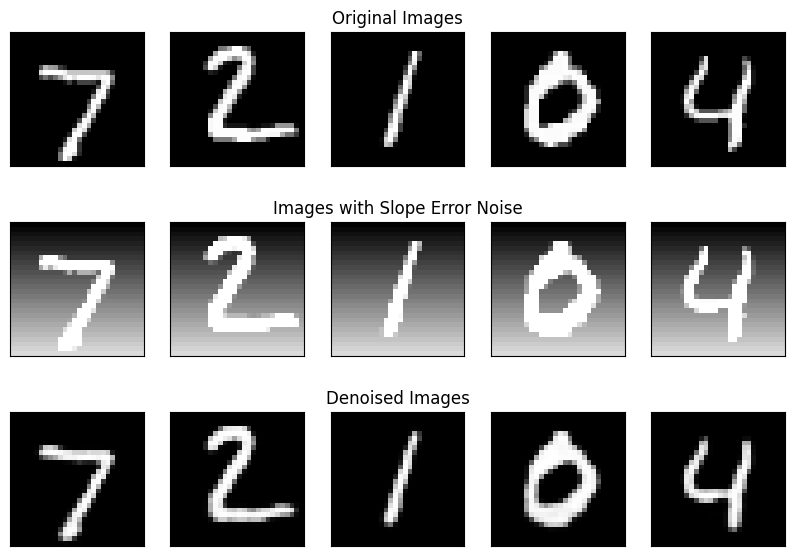

In [2]:
# 노이즈가 있는 테스트 이미지 입력
encoded_imgs = autoencoder.predict(x_test_w_slope_error)

# 결과를 플로팅
n = 5
# 기울기 오차 노이즈가 추가된 이미지 및 노이즈 제거된 이미지 시각화
plt.figure(figsize=(10, 7))
for i in range(n):
    # 원본 이미지 플로팅
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # 기울기 오차 노이즈가 추가된 이미지 플로팅
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_w_slope_error[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Images with Slope Error Noise')

    # 노이즈 제거된 이미지 플로팅
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Denoised Images')

plt.show()


- dense 보다 CNN이 확실히 noise 제거를 잘한다
- train, val loss도 낮고 denoised image에서도 차이가 보인다.

#### 방법2(뭔가 아닌 거 같음)
autoencoder.fit(x_train, x_train..) + x_test_w_slope_error(test에 대한 slope noise만 생성)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0111 - val_loss: 0.0458
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0013 - val_loss: 0.0398
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 9.6097e-04 - val_loss: 0.0355
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 8.3904e-04 - val_loss: 0.0308
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 7.8760e-04 - val_loss: 0.0297
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 7.5633e-04 - val_loss: 0.0293
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 7.2848e-04 - val_loss: 0.0293
Epoch 8/10
1875/1875 [==============================] - 59s 32ms/step - loss: 7.0051e-04 - val_loss: 0.0292
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 6.7769e-04 - val_loss: 0.0288
Epoch 10/10
313/313 [===============

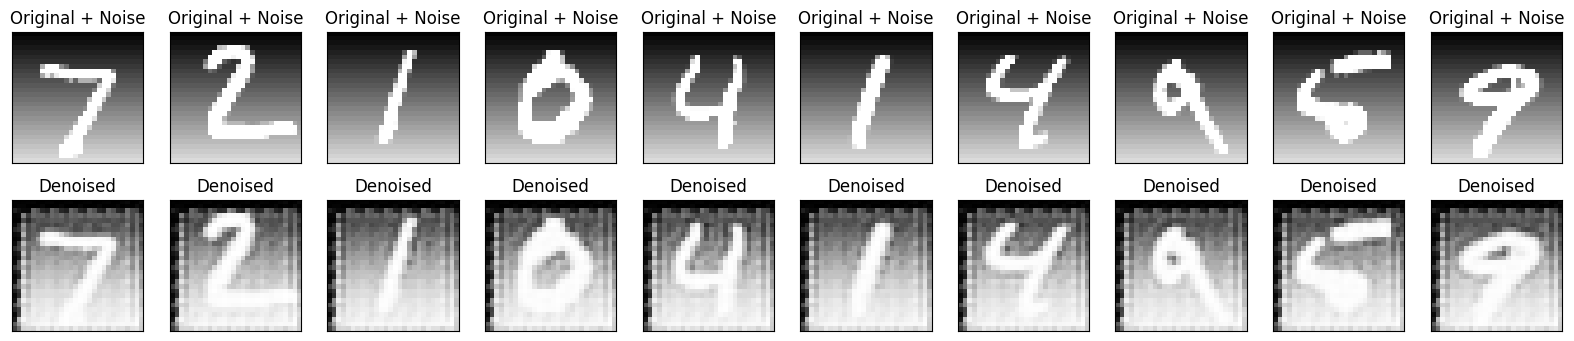

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf

# MNIST 데이터 로드
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터 정규화 및 전처리
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 데이터 차원 추가 (채널 추가)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# 이미지에 노이즈 추가
noise_factor = 0.3
slope = 2
bias = 1

slope_error_matrix = slope * np.linspace(0, 1, x_test.shape[1]).reshape(1, -1) + bias
slope_error_matrix = np.tile(slope_error_matrix, (x_test.shape[0], 1))

# slope_error_matrix의 형태를 (10000, 28, 28, 1)로 변경
slope_error_matrix = slope_error_matrix.reshape((x_test.shape[0], x_test.shape[1], 1, 1))

x_test_w_slope_error = x_test + noise_factor * slope_error_matrix
x_test_w_slope_error = np.clip(x_test_w_slope_error, 0.0, 1.0)

# CNN 기반의 Denoise 모델 정의
class Denoise(tf.keras.Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
            Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# 모델 생성 및 컴파일
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# 모델 훈련
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_w_slope_error, x_test_w_slope_error))

## fit 할 때 x_train, x_train가 맞는건지 x_train_noise, x_train이 맞는건지..##

# 노이즈가 있는 테스트 이미지 입력
decoded_imgs = autoencoder.predict(x_test_w_slope_error)

# 결과 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지 + 노이즈
    ax = plt.subplot(2, n, i + 1)
    plt.title("Original + Noise")
    plt.imshow(tf.squeeze(x_test_w_slope_error[i]), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거된 이미지
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("Denoised")
    plt.imshow(tf.squeeze(decoded_imgs[i]), cmap='gray')
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()


# 2. 시계열 denoise - Auto encoding 실험
 - 시계열 data (고민)
 - LSTM 기반 auto encoder

- with gaussian noise

## 2-1. sin, tan data 이용

Epoch 1/50
28/28 [==============================] - 9s 79ms/step - loss: 0.3427 - val_loss: 0.1654
Epoch 2/50
28/28 [==============================] - 1s 52ms/step - loss: 0.1206 - val_loss: 0.0872
Epoch 3/50
28/28 [==============================] - 1s 49ms/step - loss: 0.0471 - val_loss: 0.0335
Epoch 4/50
28/28 [==============================] - 1s 32ms/step - loss: 0.0145 - val_loss: 0.0065
Epoch 5/50
28/28 [==============================] - 1s 32ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 6/50
28/28 [==============================] - 1s 31ms/step - loss: 0.0054 - val_loss: 0.0067
Epoch 7/50
28/28 [==============================] - 1s 31ms/step - loss: 0.0048 - val_loss: 0.0082
Epoch 8/50
28/28 [==============================] - 1s 32ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 9/50
28/28 [==============================] - 1s 31ms/step - loss: 0.0034 - val_loss: 0.0116
Epoch 10/50
28/28 [==============================] - 1s 31ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 11/

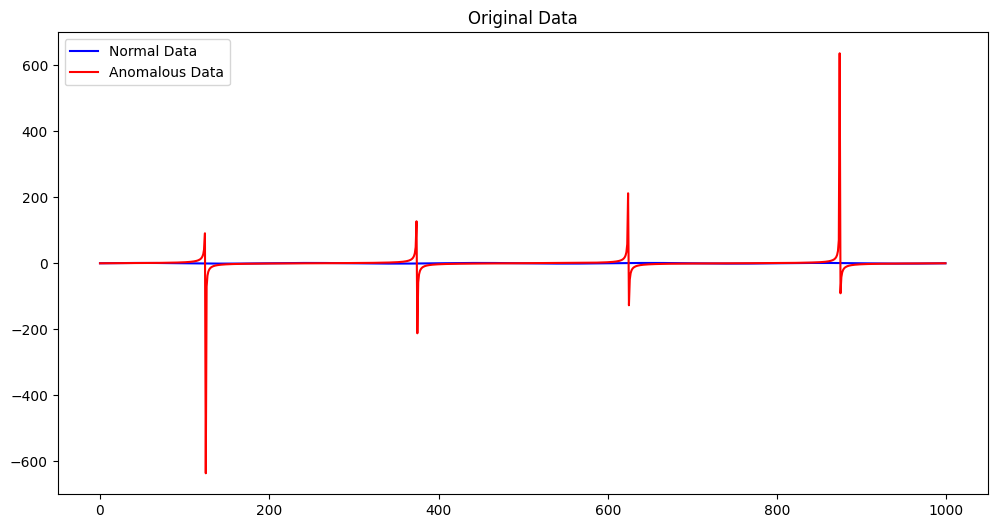

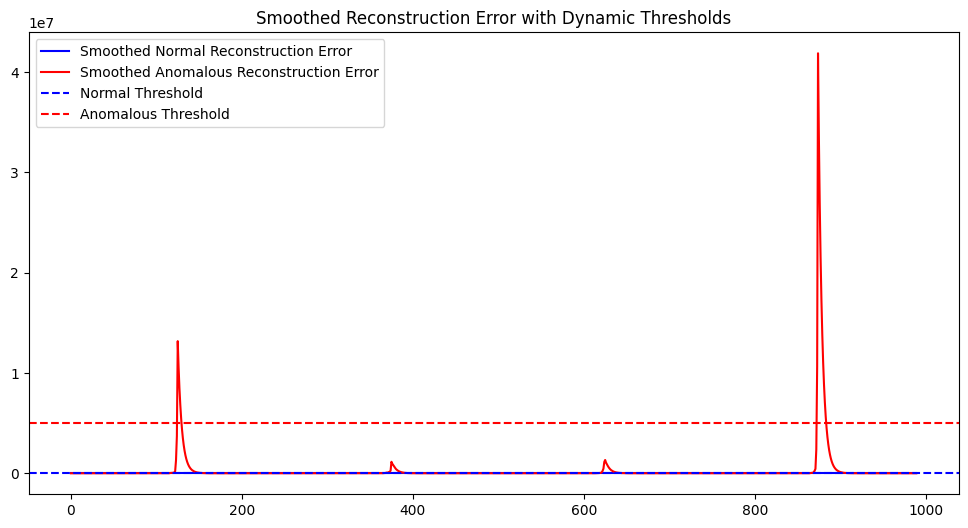

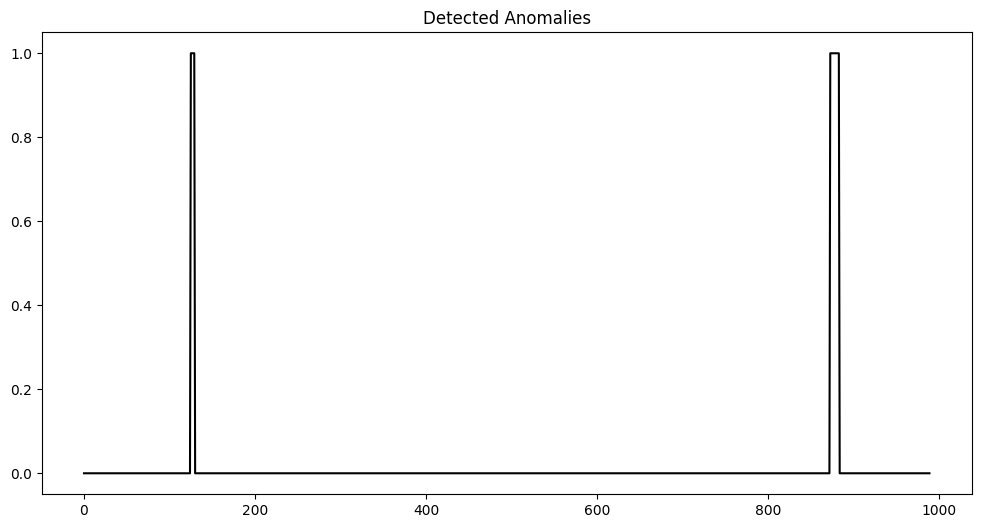

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed

def generate_sin_data(seq_length):
    time = np.linspace(0, 1, seq_length)
    data = np.sin(2 * np.pi * 5 * time)
    return data

def generate_tan_data(seq_length):
    time = np.linspace(0, 1, seq_length)
    data = np.tan(2 * np.pi * 2 * time)
    return data

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 정상 및 비정상 데이터 생성
seq_length = 10
normal_data = generate_sin_data(1000)
anomalous_data = generate_tan_data(1000)

X_normal = create_sequences(normal_data, seq_length)
X_anomalous = create_sequences(anomalous_data, seq_length)

X_normal = X_normal.reshape(X_normal.shape[0], seq_length, 1)
X_anomalous = X_anomalous.reshape(X_anomalous.shape[0], seq_length, 1)

# LSTM-AutoEncoder 모델 정의
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(RepeatVector(seq_length))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(X_normal, X_normal, epochs=50, batch_size=32, validation_split=0.1)

## noise 제거할 때는 train_noise, train 입력했는데
## 이상치 탐지 할때는 X_normal, X_normal 하는 게 맞는지..
## X_anomalous, X_normal 이 아닌지..


# 정상 데이터에 대한 복원 및 비정상 데이터에 대한 복원 에러 계산
reconstructed_normal = model.predict(X_normal)
reconstructed_anomalous = model.predict(X_anomalous)

# 복원 에러 계산
mse_normal = np.mean(np.square(X_normal - reconstructed_normal), axis=(1, 2))
mse_anomalous = np.mean(np.square(X_anomalous - reconstructed_anomalous), axis=(1, 2))

# 에러 스무딩 (Exponential Weighted Moving Average)
def exponential_moving_average(data, alpha=0.2):
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append(alpha * data[i] + (1 - alpha) * ema[-1])
    return np.array(ema)

# 에러 스무딩 적용
smoothed_mse_normal = exponential_moving_average(mse_normal)
smoothed_mse_anomalous = exponential_moving_average(mse_anomalous)

# 에러 스무딩 후 Threshold 산출
threshold_normal = np.mean(smoothed_mse_normal) + 2 * np.std(smoothed_mse_normal)
threshold_anomalous = np.mean(smoothed_mse_anomalous) + 2 * np.std(smoothed_mse_anomalous)

# 비정상 데이터 탐지
detected_anomalies = smoothed_mse_anomalous > threshold_anomalous

# 데이터 및 에러 시각화
plt.figure(figsize=(12, 6))
plt.plot(normal_data, color='blue', label='Normal Data')
plt.plot(anomalous_data, color='red', label='Anomalous Data')
plt.title('Original Data')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(smoothed_mse_normal, color='blue', label='Smoothed Normal Reconstruction Error')
plt.plot(smoothed_mse_anomalous, color='red', label='Smoothed Anomalous Reconstruction Error')
plt.axhline(y=threshold_normal, color='blue', linestyle='--', label='Normal Threshold')
plt.axhline(y=threshold_anomalous, color='red', linestyle='--', label='Anomalous Threshold')
plt.title('Smoothed Reconstruction Error with Dynamic Thresholds')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(detected_anomalies, color='black', label='Detected Anomalies')
plt.title('Detected Anomalies')
plt.show()